In [1]:
import numpy as np
from scipy import signal
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec 
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Two dimension FFT

## 1. Sine waves, 2D 

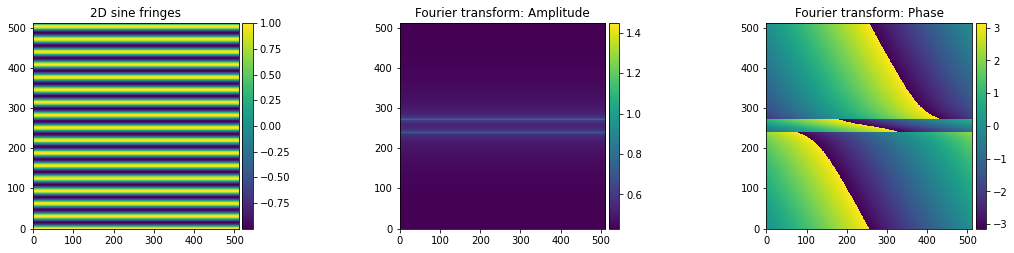

In [2]:
fig = plt.figure(1, figsize=(15,9))
gs = gridspec.GridSpec(2,3,height_ratios=[1,1], width_ratios=[1,1,1])
gs.update(left=0.01, right=0.95, bottom=0.02, top=0.75, wspace=0.3, hspace=0.30)


# Making image of sine waves / fringes
Nframe = 512
frqcy = 5
x = np.arange(0, Nframe)
cosT = np.cos(x/frqcy) 
image_sine = np.zeros((Nframe,Nframe))
for i in range(0,Nframe-1):
        image_sine[:,i] = cosT

ax = plt.subplot(gs[0,0]) 
plt.title('2D sine fringes')
im = ax.imshow(image_sine, cmap='viridis', origin='lower',interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# 2D Fourier transform
ft_image_sine = np.fft.fftshift(np.fft.fft2(image_sine))

#Amplitude (power 0.1)
ampli_image_sine = np.abs(ft_image_sine)/np.sum(image_sine)
ax = plt.subplot(gs[0,1]) 
im = ax.imshow((ampli_image_sine)**0.1, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Amplitude')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#Phase (between 0 and !pi)
phase_image_sine = np.angle(ft_image_sine)
ax = plt.subplot(gs[0,2]) 
im = ax.imshow(phase_image_sine, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Phase')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

## 2. Simple appertures
*Because the magic of optics:*
In the far field approximation (valid in astronomy, stars are ultra far away), the Fraunhofer approximation is valid. The image of a point source (unresoved source, e.g. a star) is the Fourier transform of the telescope apperture. In other words **the telescope is a spatial filter** (low pass filter) and the image is the diffraction pattern due to the point source through the entrance pupil. 

Next notebooks will detail more the notions of imaging !

### 1.1 Create a circular apperture

In [ ]:
#Function to make a circular apperture of given radius in a square frame
def mk_pupilc(radius,Nframe):
    P = np.zeros((Nframe,Nframe))#,dtype=complex)
    for k in range(Nframe):
            for m in range(Nframe):
                if pow((k-Nframe/2)*(k-Nframe/2)+(m-Nframe/2)*(m-Nframe/2),0.5) < radius:
                    P[k,m] = 1.0
    return P

In [ ]:
fig = plt.figure(1, figsize=(15,9))
gs = gridspec.GridSpec(2,3,height_ratios=[1,1], width_ratios=[1,1,1])
gs.update(left=0.01, right=0.95, bottom=0.02, top=0.75, wspace=0.3, hspace=0.30)

# Making apperture
Nframe = 512
Radius = 20
circular_app = mk_pupilc(Radius,Nframe)
circular_app_c = circular_app+1j*(circular_app*0.)
ax = plt.subplot(gs[0,0]) 
plt.title('Circular pupil')
im = ax.imshow(circular_app, cmap='viridis', origin='lower',interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# 2D Fourier transform
ft_circular_app = np.fft.fftshift(np.fft.fft2(circular_app))

#Amplitude (power 0.1)
ampli_circular_app = np.abs(ft_circular_app)/np.sum(circular_app)
ax = plt.subplot(gs[0,1]) 
im = ax.imshow((ampli_circular_app)**0.1, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Amplitude')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#Phase (between 0 and !pi)
phase_circular_app = np.angle(ft_circular_app)
ax = plt.subplot(gs[0,2]) 
im = ax.imshow(phase_circular_app, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Phase')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

### 1.2 Create a square / rectangular apperture

In [ ]:
fig = plt.figure(1, figsize=(15,9))
gs = gridspec.GridSpec(2,3,height_ratios=[1,1], width_ratios=[1,1,1])
gs.update(left=0.01, right=0.95, bottom=0.02, top=0.75, wspace=0.3, hspace=0.30)

# Making apperture
Nframe = 512
dim_x = 70
dim_y = 70
rect_apperture = np.zeros((Nframe, Nframe))
rect_apperture[Nframe//2-dim_x//2:Nframe//2+dim_x//2, Nframe//2-dim_y//2:Nframe//2+dim_y//2] = 1
ax = plt.subplot(gs[0,0]) 
plt.title('Rectangular pupil')
im = ax.imshow(rect_apperture, cmap='viridis', origin='lower',interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# 2D Fourier transform
ft_rect_apperture = np.fft.fftshift(np.fft.fft2(rect_apperture))

#Amplitude (log scale)
ampli_rect_apperture = np.abs(ft_rect_apperture)/np.sum(rect_apperture)
ax = plt.subplot(gs[0,1]) 
im = ax.imshow((ampli_rect_apperture)**0.2, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Amplitude')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#Phase (between 0 and !pi)
phase_rect_apperture = np.angle(ft_rect_apperture)
ax = plt.subplot(gs[0,2]) 
im = ax.imshow(phase_rect_apperture, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Phase')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

### 1.3 Create a Gaussian apperture

In [ ]:
fig = plt.figure(1, figsize=(15,9))
gs = gridspec.GridSpec(2,3,height_ratios=[1,1], width_ratios=[1,1,1])
gs.update(left=0.01, right=0.95, bottom=0.02, top=0.75, wspace=0.3, hspace=0.30)

# Making apperture
Nframe = 512
fwhm = 0.01
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = stats.multivariate_normal([0, 0],[fwhm,fwhm]) #centered, variance 0.1
prof_gauss = rv.pdf(pos)
sz_prof = np.shape(prof_gauss)[0]
gauss_app = np.zeros((Nframe,Nframe))
gauss_app[Nframe//2-sz_prof//2:Nframe//2+sz_prof//2,Nframe//2-sz_prof//2:Nframe//2+sz_prof//2] = prof_gauss
ax = plt.subplot(gs[0,0]) 
plt.title('Gaussian pupil')
im = ax.imshow(gauss_app, cmap='viridis', origin='lower',interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# 2D Fourier transform
ft_gauss_app = np.fft.fftshift(np.fft.fft2(gauss_app))

#Amplitude (power 0.1)
ampli_gauss_app = np.abs(ft_gauss_app)/np.sum(gauss_app)
ax = plt.subplot(gs[0,1]) 
im = ax.imshow((ampli_gauss_app)**0.1, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Amplitude')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#Phase (between 0 and !pi)
phase_gauss_app = np.angle(ft_gauss_app)
ax = plt.subplot(gs[0,2]) 
im = ax.imshow(phase_gauss_app, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Phase')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

### 1.4 Create your own weird apperture

In [ ]:
import cv2
fig = plt.figure(1, figsize=(15,9))
gs = gridspec.GridSpec(2,3,height_ratios=[1,1], width_ratios=[1,1,1])
gs.update(left=0.01, right=0.95, bottom=0.02, top=0.75, wspace=0.3, hspace=0.30)

# Making apperture
Nframe = 512
weirdo = cv2.imread("./penguin.png", 0)
sz_prof = np.shape(weirdo)[0]
apperture = np.zeros((Nframe,Nframe))
apperture[Nframe//2-sz_prof//2:Nframe//2+sz_prof//2,Nframe//2-sz_prof//2:Nframe//2+sz_prof//2] = weirdo
ax = plt.subplot(gs[0,0]) 
plt.title('Weird pupil')
im = ax.imshow(apperture, cmap='viridis', origin='lower',interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# 2D Fourier transform
ft_apperture = np.fft.fftshift(np.fft.fft2(apperture))

#Amplitude (power 0.1)
ampli_apperture = np.abs(ft_apperture)/np.sum(apperture)
ax = plt.subplot(gs[0,1]) 
im = ax.imshow((ampli_apperture)**0.1, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Amplitude')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#Phase (between 0 and !pi)
phase_apperture = np.angle(ft_apperture)
ax = plt.subplot(gs[0,2]) 
im = ax.imshow(phase_apperture, cmap='viridis', origin='lower',interpolation='nearest')
plt.title('Fourier transform: Phase')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

### 1.5 Fizeau interferometer